In [55]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn import preprocessing 
from sklearn.cluster import KMeans 

In [56]:
# Read dataset
df = pd.read_csv("dataset/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Analysis data (Check missing values, remove outliers, convert text to numeric data, normalizing)

In [57]:
# Convert text to numeric data 
label_encoder = preprocessing.LabelEncoder() 
df["Gender"] = label_encoder.fit_transform(df["Gender"])

In [58]:
# Check missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

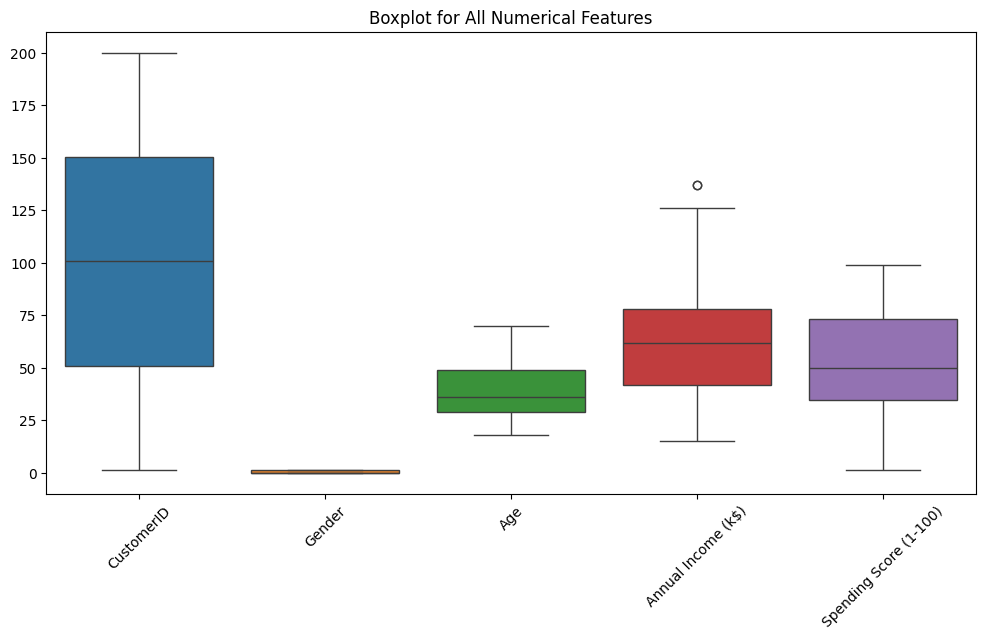

In [59]:
# Found outliers 
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot for All Numerical Features")
plt.xticks(rotation=45)
plt.show()

In [60]:
# Remove outliers 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1 
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [61]:
# Split dataframe and remove CustomerID, Gender 
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

In [62]:
# Normalizing data 
scaler = preprocessing.StandardScaler() 
X = scaler.fit_transform(X) 

### Modeling with KMeans 

/home/amirmohammad/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/amirmohammad/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/amirmohammad/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/amirmohammad/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will chang

Best sum of cluster (Elbow) = 4


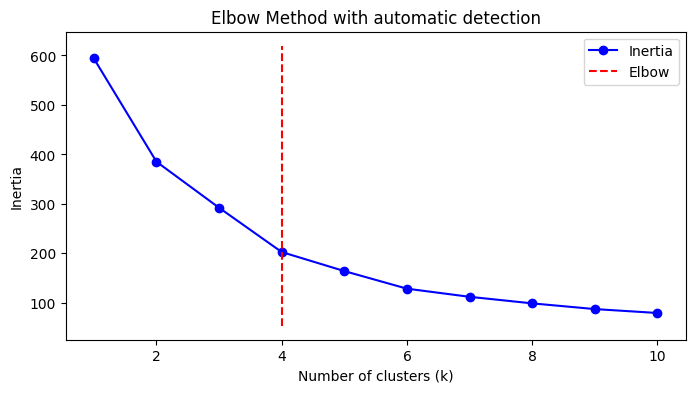

In [ ]:
# Found a best K with Elbow method 

from kneed import KneeLocator

inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

k_nee = KneeLocator(K_range, inertia, curve='convex', direction='decreasing')
best_k = k_nee.knee
print("Best sum of cluster (Elbow) =", best_k)

plt.figure(figsize=(8,4))
plt.plot(K_range, inertia, 'bo-', label='Inertia')
plt.vlines(best_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red', label='Elbow')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method with automatic detection")
plt.legend()
plt.show()

In [70]:
# Fit model with K:4 

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X) 
df["Cluster"] = kmeans.labels_

/home/amirmohammad/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


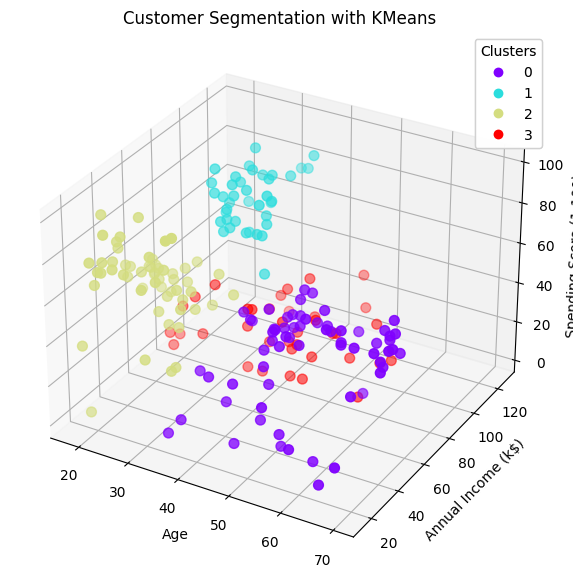

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # for create 3D plot

x = df['Age']
y = df['Annual Income (k$)']
z = df['Spending Score (1-100)']
clusters = df['Cluster']

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=clusters, cmap='rainbow', s=50)

ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.set_title("Customer Segmentation with KMeans")

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()